In [1]:
!pip install opendatasets
import opendatasets as od
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

Задача - предсказать будет завтра дождь или нет. Целевая переменная RainTomorrow

In [4]:
od.download('https://www.kaggle.com/competitions/weather-prediction/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nitnatsn0k
Your Kaggle Key: ··········


100%|██████████| 3.88M/3.88M [00:00<00:00, 110MB/s]


Extracting archive ./weather-prediction/weather-prediction.zip to ./weather-prediction


In [5]:
train = pd.read_csv('/content/weather-prediction/train_weather.csv')
train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Brisbane,13.7,23.6,0.0,5.0,9.6,SSE,24.0,SSW,ESE,...,65.0,53.0,1028.4,1026.7,1.0,1.0,18.3,22.3,0,0
1,Sydney,15.4,21.2,61.2,5.8,2.7,S,43.0,WSW,SSW,...,91.0,65.0,1018.8,1016.5,8.0,7.0,15.6,20.7,1,1
2,Richmond,16.8,30.9,1.0,NaN,NaN,NE,35.0,NNW,NE,...,80.0,38.0,1020.4,1013.2,1.0,NaN,19.6,30.0,0,0
3,NorfolkIsland,13.9,17.1,0.2,3.8,8.9,SE,37.0,SE,SSE,...,56.0,63.0,1027.7,1026.1,3.0,1.0,15.3,15.8,0,0
4,Mildura,16.0,36.1,0.0,6.8,12.9,ENE,33.0,ENE,E,...,58.0,32.0,1018.5,1016.0,0.0,3.0,26.0,34.9,0,0


<ipython-input-6-44f3157e867e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corel = train.corr()
<ipython-input-6-44f3157e867e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns, cmap='RdYlGn', center=0, annot=True)


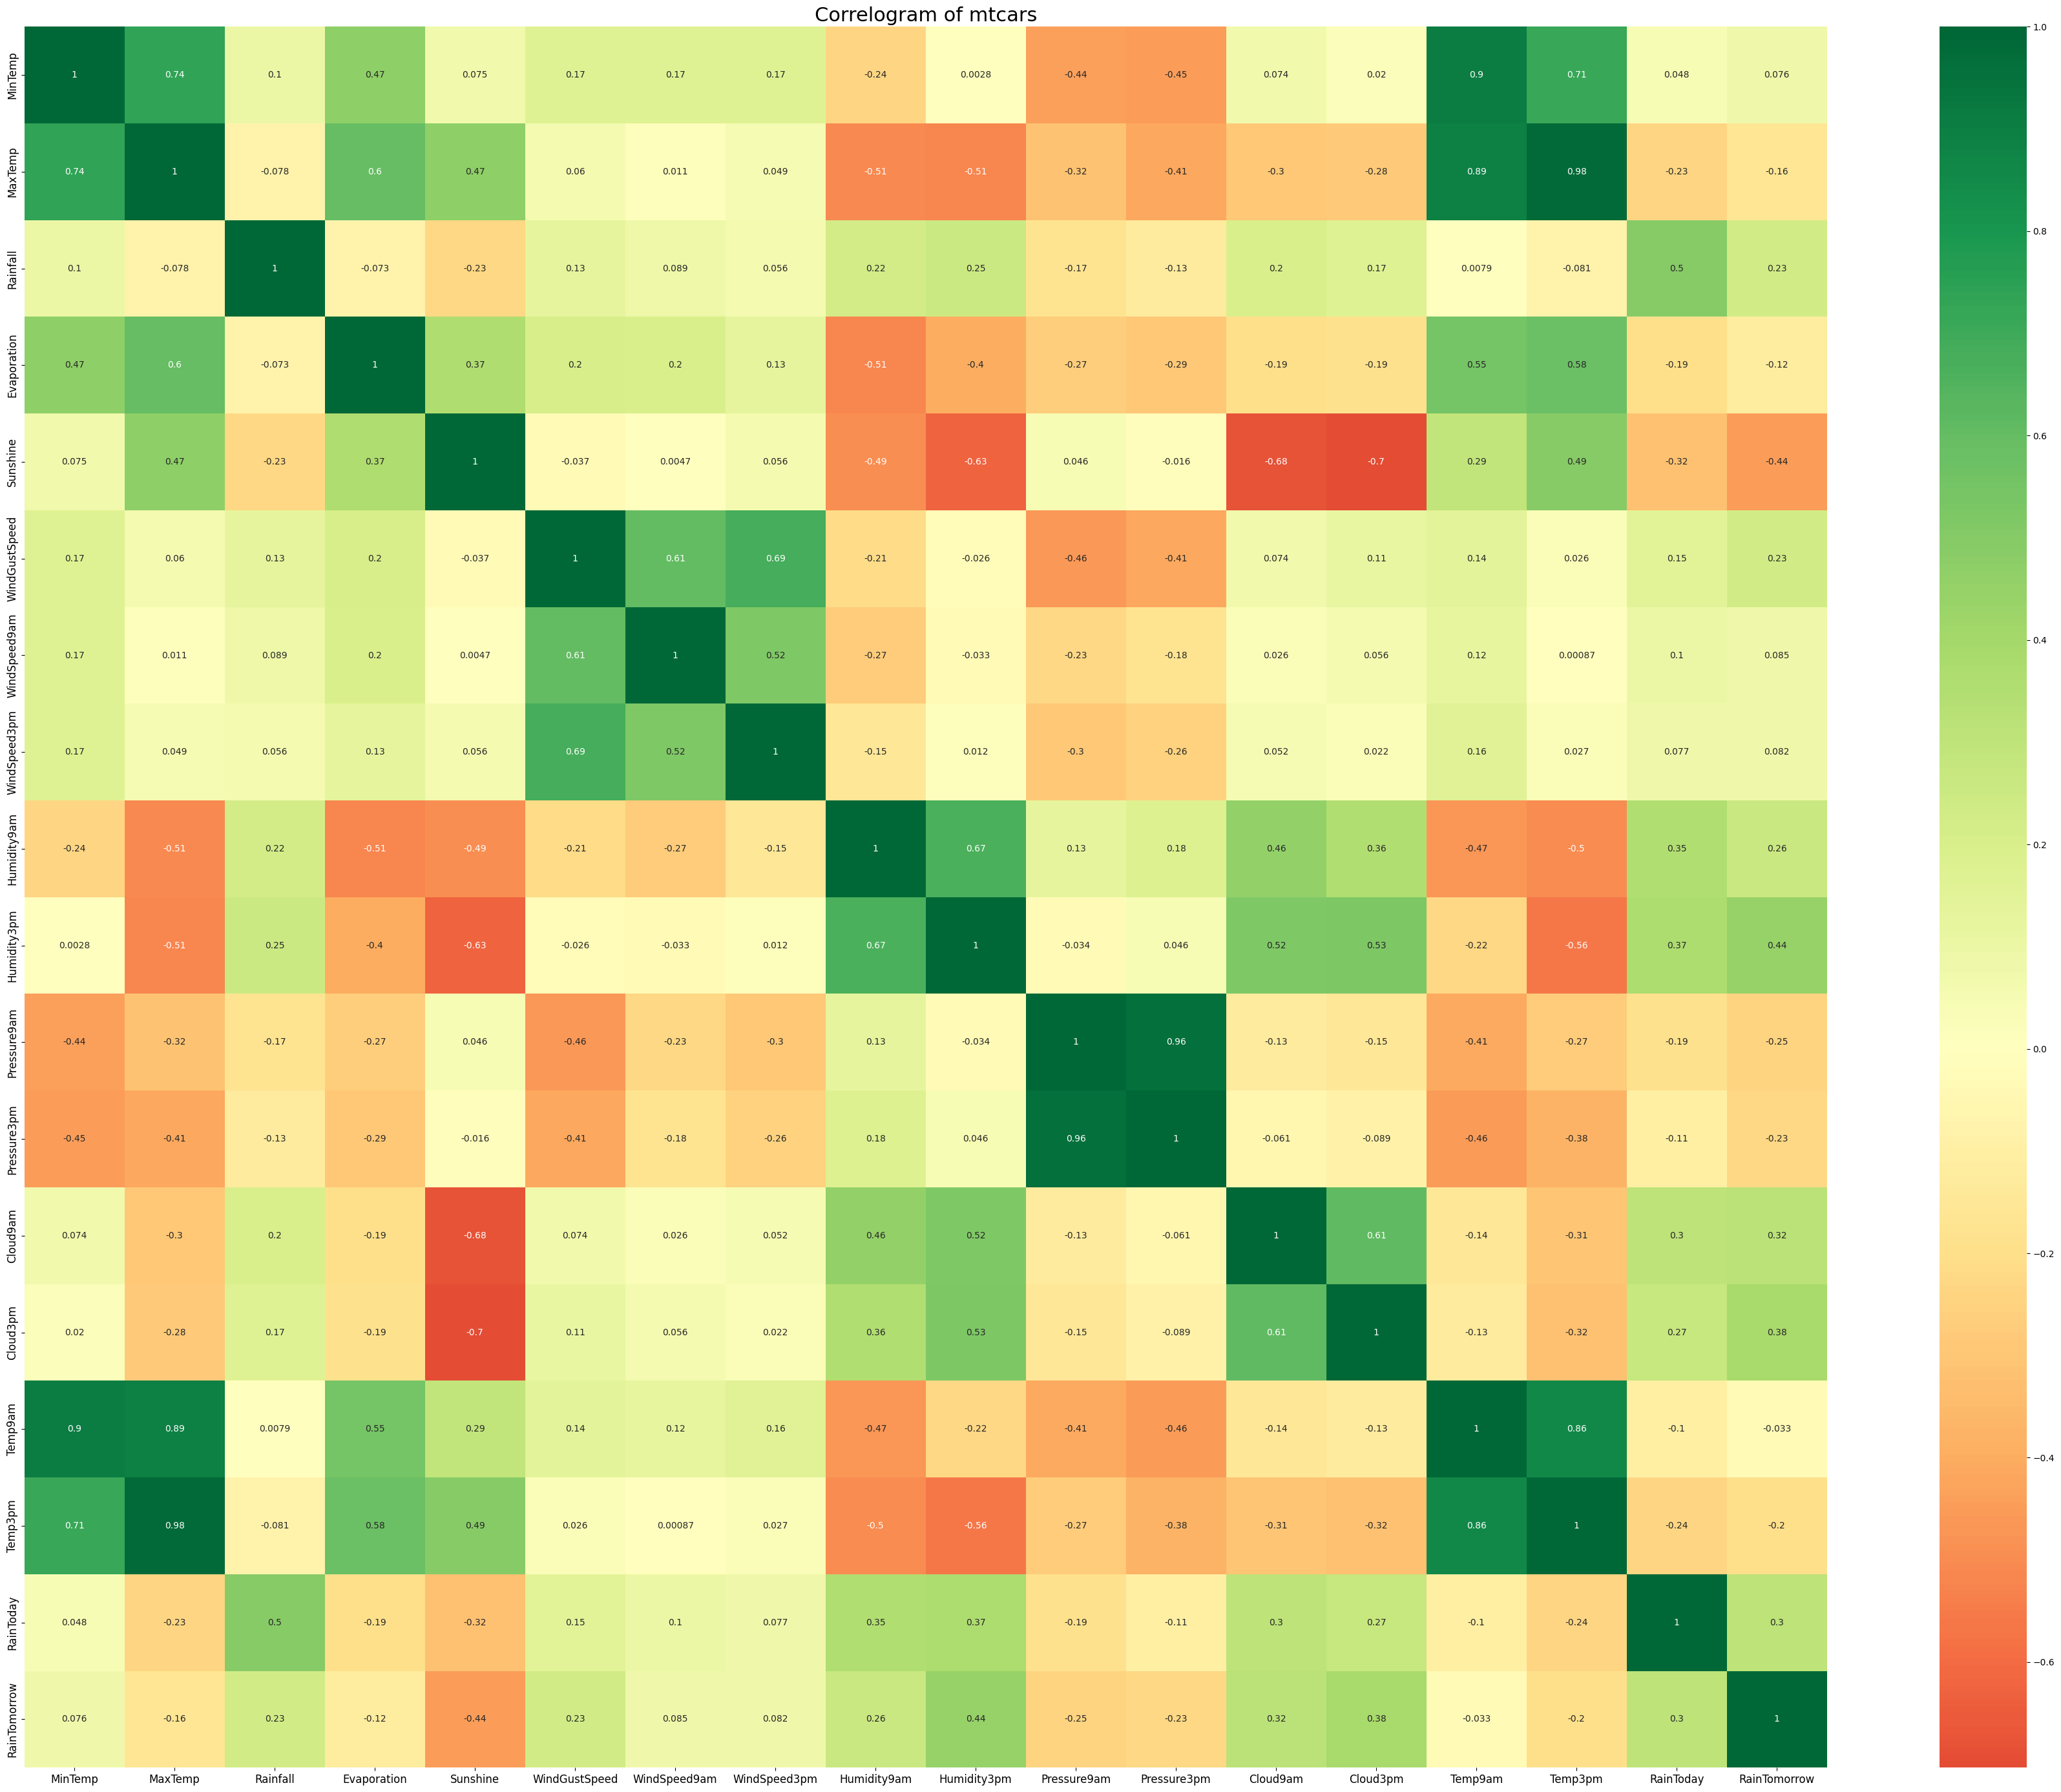

In [6]:
import seaborn as sns
corel = train.corr()
corel
plt.figure(figsize=(45,35))
sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121873 entries, 0 to 121872
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       121873 non-null  object 
 1   MinTemp        120652 non-null  float64
 2   MaxTemp        120842 non-null  float64
 3   Rainfall       119145 non-null  float64
 4   Evaporation    71329 non-null   float64
 5   Sunshine       65698 non-null   float64
 6   WindGustDir    113157 non-null  object 
 7   WindGustSpeed  113212 non-null  float64
 8   WindDir9am     112959 non-null  object 
 9   WindDir3pm     118519 non-null  object 
 10  WindSpeed9am   120354 non-null  float64
 11  WindSpeed3pm   119528 non-null  float64
 12  Humidity9am    119642 non-null  float64
 13  Humidity3pm    118491 non-null  float64
 14  Pressure9am    109238 non-null  float64
 15  Pressure3pm    109271 non-null  float64
 16  Cloud9am       75814 non-null   float64
 17  Cloud3pm       73397 non-null

In [9]:
train.isna().sum()

Location             0
MinTemp           1221
MaxTemp           1031
Rainfall          2728
Evaporation      50544
Sunshine         56175
WindGustDir       8716
WindGustSpeed     8661
WindDir9am        8914
WindDir3pm        3354
WindSpeed9am      1519
WindSpeed3pm      2345
Humidity9am       2231
Humidity3pm       3382
Pressure9am      12635
Pressure3pm      12602
Cloud9am         46059
Cloud3pm         48476
Temp9am           1533
Temp3pm           2656
RainToday            0
RainTomorrow         0
dtype: int64

In [11]:
value1 = train['MinTemp'].mode()[0] 
value2 = train['MaxTemp'].mode()[0] 
value3 = train['Rainfall'].mode()[0]
value4 = train['WindGustSpeed'].mode()[0]
value5 = train['WindSpeed9am'].mode()[0]
value6 = train['WindSpeed3pm'].mode()[0]
value7 = train['Humidity9am'].mode()[0]
value8 = train['Humidity3pm'].mode()[0]
value9 = train['Temp9am'].mode()[0]
value10 = train['Temp3pm'].mode()[0]
value11 = train['Pressure9am'].mode()[0]
value12 = train['Pressure3pm'].mode()[0]
value13 = train['Evaporation'].mode()[0]
value14 = train['Sunshine'].mode()[0]
value15 = train['Cloud9am'].mode()[0]
value16 = train['Cloud3pm'].mode()[0]
value113 = train['Location'].mode()[0]
value114 = train['WindGustDir'].mode()[0]
value115 = train['WindDir9am'].mode()[0]
value116 = train['WindDir3pm'].mode()[0]


train['Location'] = train['Location'].fillna(value113)
train['WindGustDir'] = train['WindGustDir'].fillna(value114)
train['WindDir9am'] = train['WindDir9am'].fillna(value115)
train['WindDir3pm'] = train['WindDir3pm'].fillna(value116)
train['Evaporation'] = train['Evaporation'].fillna(value13)
train['Sunshine'] = train['Sunshine'].fillna(value14)
train['Cloud9am'] = train['Cloud9am'].fillna(value15)
train['Cloud3pm'] = train['Cloud3pm'].fillna(value16)
train['MinTemp'] = train['MinTemp'].fillna(value1)
train['MaxTemp'] = train['MaxTemp'].fillna(value2)
train['Rainfall'] = train['Rainfall'].fillna(value3)
train['WindGustSpeed'] = train['WindGustSpeed'].fillna(value4)
train['WindSpeed9am'] = train['WindSpeed9am'].fillna(value5)
train['WindSpeed3pm'] = train['WindSpeed3pm'].fillna(value6)
train['Humidity9am'] = train['Humidity9am'].fillna(value7)
train['Humidity3pm'] = train['Humidity3pm'].fillna(value8)
train['Temp9am'] = train['Temp9am'].fillna(value9)
train['Temp3pm'] = train['Temp3pm'].fillna(value10)
train['Pressure9am'] = train['Pressure9am'].fillna(value11)
train['Pressure3pm'] = train['Pressure3pm'].fillna(value12)


In [12]:
train.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**Балансировка**

Тестировались следующие варианты:


1.   **oversampling** с помощью SMOTE. В этом случае метрики в гугл колабе хорошие(*accuracy:* 0.902902248042435, *recall*:  0.8555949816246357, *precision*:  0.9238505747126436, *f1:*  0.8884137114283834). А на кагле метрики значительно хуже, например accuracy падает в 2 раза.

2.   **undersampling** с помощью  NearMiss. В таком случае наивысший результат был достигнут с помощью LogReg (*accuracy на kaggle* 0.7).

3.   **Без балансировки.** В этом случае была получена наивысшая точность на кагле. Результат без балансировки с помощью LogReg (*accuracy на kaggle* 0.847), а также примерно на равне идет KNN без балансировки (*accuracy на kaggle* 0.83).

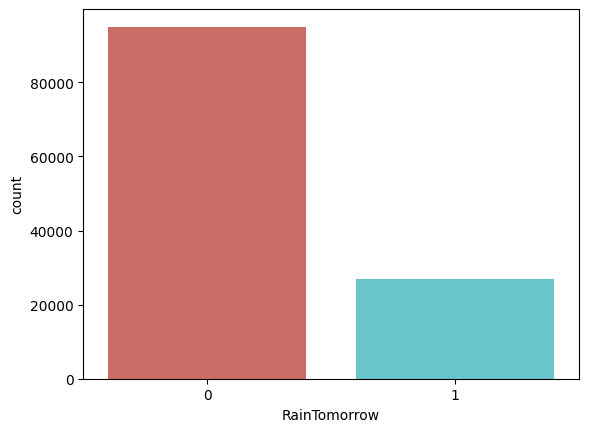

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.countplot(x=train['RainTomorrow'], ax=ax, palette='hls')
plt.show()

In [14]:
train['RainTomorrow'].value_counts() 

0    95015
1    26858
Name: RainTomorrow, dtype: int64

In [15]:
train = pd.get_dummies(train, columns = ['Location','WindGustDir','WindDir9am','WindDir3pm']) 

In [16]:
X = train.drop(['RainTomorrow'], axis=1)
Y = train['RainTomorrow']  

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
columns = X.columns
nm_data_X, nm_data_y = nm.fit_resample(X, Y)                          #- undersampling
nm_data_X = pd.DataFrame(nm_data_X, columns = columns) 
nm_data_y = pd.DataFrame(nm_data_y, columns = ['RainTomorrow'])

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler()
rs_data_X, rs_data_y = nm.fit_resample(X, Y)                      #- undersampling 2 способ
rs_data_X = pd.DataFrame(rs_data_X, columns = columns)
rs_data_y = pd.DataFrame(rs_data_y, columns = ['RainTomorrow'])

In [ ]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=35)

columns = X.columns

os_data_X, os_data_y = os.fit_resample(X, Y)               #- oversampling
os_data_X = pd.DataFrame(os_data_X, columns = columns)
os_data_y = pd.DataFrame(os_data_y, columns = ['RainTomorrow'])


По итогам нескольких попыток бало принято решение делать без балансировки, так как в таком случае итоговая точность на kaggle значительно больше.

**Стандартизация**

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(X)

pd.DataFrame(X_st, columns = X.columns)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.264731,0.083124,-0.275493,0.055922,1.173101,-1.191979,-0.789051,-1.107430,-0.226516,0.069472,...,-0.24062,-0.253758,-0.269600,-0.336193,-0.260738,-0.240753,-0.262099,-0.275282,-0.257438,-0.265710
1,0.533071,-0.256236,7.076155,0.304379,-0.296748,0.242450,0.557067,0.604956,1.122357,0.655522,...,-0.24062,-0.253758,-0.269600,-0.336193,-0.260738,4.153632,-0.262099,-0.275282,-0.257438,-0.265710
2,0.754056,1.115343,-0.155368,-0.254650,-0.871906,-0.361520,-0.789051,0.833274,0.551680,-0.663090,...,-0.24062,-0.253758,-0.269600,-0.336193,-0.260738,-0.240753,-0.262099,-0.275282,-0.257438,-0.265710
3,0.296301,-0.835975,-0.251468,-0.316764,1.023986,-0.210528,0.332714,0.148320,-0.693433,0.557847,...,-0.24062,-0.253758,-0.269600,-0.336193,3.835275,-0.240753,-0.262099,-0.275282,-0.257438,-0.265710
4,0.627779,1.850622,-0.275493,0.614951,1.876072,-0.512513,0.332714,0.034161,-0.589674,-0.956115,...,-0.24062,-0.253758,-0.269600,-0.336193,-0.260738,-0.240753,-0.262099,-0.275282,-0.257438,-0.265710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121868,0.880333,0.295224,-0.275493,-0.254650,-0.871906,1.223901,-0.564698,0.034161,-0.589674,0.313659,...,-0.24062,-0.253758,-0.269600,-0.336193,-0.260738,-0.240753,-0.262099,-0.275282,-0.257438,-0.265710
121869,0.485717,0.309364,-0.275493,1.608780,1.535238,0.619931,-0.340345,1.061593,-0.745313,-0.516578,...,-0.24062,-0.253758,-0.269600,-0.336193,-0.260738,-0.240753,-0.262099,-0.275282,-0.257438,3.763508
121870,-0.240378,-0.652155,-0.131343,-0.254650,-0.871906,0.770924,0.108361,-0.650794,1.433636,2.022971,...,-0.24062,-0.253758,-0.269600,-0.336193,-0.260738,-0.240753,-0.262099,-0.275282,-0.257438,-0.265710
121871,0.248947,-0.454196,0.036832,-0.254650,0.725756,1.072909,-0.340345,0.148320,0.344161,-0.272390,...,-0.24062,-0.253758,-0.269600,-0.336193,-0.260738,-0.240753,-0.262099,-0.275282,-0.257438,3.763508


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_st, Y, test_size=1/5, random_state=42)

print(f'Train shape: {X_train.shape}, {y_train.shape}')
print(f'Test shape: {X_test.shape}, {y_test.shape}')

Train shape: (97498, 114), (97498,)
Test shape: (24375, 114), (24375,)


**Логистичекая регрессия**

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
answers_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,answers_pred))

0.850625641025641


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("accuracy " , accuracy_score(y_test, answers_pred))
print("recall " , recall_score(y_test, answers_pred))
print("precision " , precision_score(y_test, answers_pred))
print("f1: " , f1_score(y_test, answers_pred))
#accuracy  0.8503421454241127
#recall  0.5026297736107935
#precision  0.7175971269996735       - метрики без балансировки, на кагле 0.84
#f1:  0.5911780527165142

#accuracy 0.902902248042435
#recall  0.8555949816246357v
#precision  0.9238505747126436        - метрики с балансировкой, но на кагле 0,34
#f1:  0.8884137114283834


accuracy  0.850625641025641
recall  0.4998103905953735
precision  0.7243748282495192
f1:  0.5914955682710648


**Дерево**

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = None, random_state=42)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
y_pred_tree

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [36]:
print("Accuracy:", accuracy_score(y_test,y_pred_tree))
print("Recall:", recall_score(y_test,y_pred_tree))
print("Precision:", precision_score(y_test,y_pred_tree))
#Accuracy: 0.8436036415302847
#Recall: 0.8535246939636978           - метрики с балансировкой, но на кагле около 0.6
#Precision: 0.8362282878411911

Accuracy: 0.7920410256410256
Recall: 0.5398179749715586
Precision: 0.5186737110584806


**KNN**

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
scores = []
for i in range(1,25):
    score = {}
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    answers = knn.predict(X_test) # метод predict возвращает вектор ответов для X_test
    
    score['k'] = i
    score['accuracy'] = accuracy_score(answers,y_test)
    score['recall'] = recall_score(answers,y_test)
    score['presicion'] = precision_score(answers,y_test)
    scores.append(score)
scores = pd.DataFrame(scores)
scores

,k,accuracy,recall,presicion
0,1,0.768779,0.462401,0.422071
1,2,0.799303,0.600000,0.217292
2,3,0.795036,0.538957,0.364619
3,4,0.806523,0.642492,0.238529
4,5,0.807918,0.600612,0.335040
5,6,0.810338,0.669443,0.243838
6,7,0.812021,0.631359,0.315320
7,8,0.810503,0.671197,0.243458
8,9,0.813005,0.646003,0.300341
9,10,0.811200,0.678344,0.242321


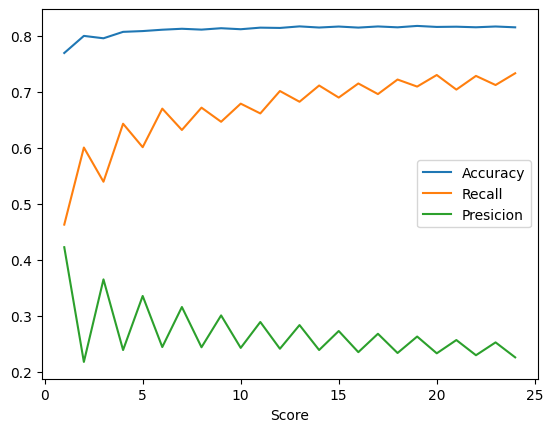

In [38]:
plt.plot(scores['k'], scores['accuracy'], label='Accuracy')
plt.plot(scores['k'], scores['recall'], label='Recall')
plt.plot(scores['k'], scores['presicion'], label='Presicion')
plt.xlabel('K')
plt.xlabel('Score')
plt.legend()

In [39]:
knn = KNeighborsClassifier(15) 

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [41]:
y_pred_knn = knn.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred_knn) #accuracy 0.86 если делать балансировку, но на кагле значительно хуже

0.816

In [43]:
test = pd.read_csv('/content/weather-prediction/test_weather.csv')
test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,PearceRAAF,11.0,22.1,0.0,NaN,8.2,ESE,57.0,E,E,...,22.0,52.0,34.0,1028.5,1024.6,3.0,NaN,14.7,20.7,0
1,Albury,5.6,20.7,0.0,NaN,NaN,ESE,44.0,SE,NNE,...,24.0,65.0,42.0,1023.0,1018.1,NaN,NaN,13.9,20.3,0
2,Cobar,9.5,18.4,0.0,1.6,NaN,SW,26.0,WNW,SSW,...,15.0,67.0,43.0,1024.7,1021.5,7.0,7.0,11.5,17.9,0
3,Albany,18.4,22.0,0.0,3.8,0.2,NaN,NaN,E,ESE,...,19.0,80.0,79.0,1019.5,1017.0,8.0,8.0,20.7,21.4,0
4,MountGambier,10.4,20.7,0.4,3.8,9.0,SSW,43.0,WSW,SW,...,26.0,55.0,38.0,1019.5,1022.4,5.0,4.0,15.7,18.0,0


In [45]:
value17 = test['MinTemp'].mode()[0]
value18 = test['MaxTemp'].mode()[0]
value19 = test['Rainfall'].mode()[0]
value20 = test['WindGustSpeed'].mode()[0]
value21 = test['WindSpeed9am'].mode()[0]
value22 = test['WindSpeed3pm'].mode()[0]
value23 = test['Humidity9am'].mode()[0]
value24 = test['Humidity3pm'].mode()[0]
value25 = test['Temp9am'].mode()[0]
value26 = test['Temp3pm'].mode()[0]
value27 = test['Pressure9am'].mode()[0]
value28 = test['Pressure3pm'].mode()[0]
value29 = test['Evaporation'].mode()[0]
value30 = test['Sunshine'].mode()[0]
value31 = test['Cloud9am'].mode()[0]
value32 = test['Cloud3pm'].mode()[0]
value133 = test['Location'].mode()[0]
value134 = test['WindGustDir'].mode()[0]
value135 = test['WindDir9am'].mode()[0]
value136 = test['WindDir3pm'].mode()[0]


test['Location'] = test['Location'].fillna(value133)
test['WindGustDir'] = test['WindGustDir'].fillna(value134)
test['WindDir9am'] = test['WindDir9am'].fillna(value135)
test['WindDir3pm'] = test['WindDir3pm'].fillna(value136)
test['MinTemp'] = train['MinTemp'].fillna(value17)
test['MaxTemp'] = test['MaxTemp'].fillna(value18)
test['Rainfall'] = test['Rainfall'].fillna(value19)
test['WindGustSpeed'] = test['WindGustSpeed'].fillna(value20)
test['WindSpeed9am'] = test['WindSpeed9am'].fillna(value21)
test['WindSpeed3pm'] = test['WindSpeed3pm'].fillna(value22)
test['Humidity9am'] = test['Humidity9am'].fillna(value23)
test['Humidity3pm'] = test['Humidity3pm'].fillna(value24)
test['Temp9am'] = test['Temp9am'].fillna(value25)
test['Temp3pm'] = test['Temp3pm'].fillna(value26)
test['Pressure9am'] = test['Pressure9am'].fillna(value27)
test['Pressure3pm'] = test['Pressure3pm'].fillna(value28)
test['Evaporation'] = test['Evaporation'].fillna(value29)
test['Sunshine'] = test['Sunshine'].fillna(value30)
test['Cloud9am'] = test['Cloud9am'].fillna(value31)
test['Cloud3pm'] = test['Cloud3pm'].fillna(value32)

In [46]:
test.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [47]:
test= pd.get_dummies(test, columns = ['Location','WindGustDir','WindDir9am','WindDir3pm'])
test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.7,22.1,0.0,4.0,8.2,57.0,30.0,22.0,52.0,34.0,...,0,0,0,0,0,0,0,0,0,0
1,15.4,20.7,0.0,4.0,0.0,44.0,7.0,24.0,65.0,42.0,...,0,0,0,0,0,0,0,0,0,0
2,16.8,18.4,0.0,1.6,0.0,26.0,2.0,15.0,67.0,43.0,...,0,0,0,0,0,1,0,0,0,0
3,13.9,22.0,0.0,3.8,0.2,39.0,22.0,19.0,80.0,79.0,...,0,0,0,0,0,0,0,0,0,0
4,16.0,20.7,0.4,3.8,9.0,43.0,15.0,26.0,55.0,38.0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
sc = StandardScaler()
test_std = sc.fit_transform(test)
pd.DataFrame(test_std, columns = test.columns)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.237422,-0.147951,-0.269213,-0.277428,0.854055,1.297465,1.789369,0.385325,-0.882796,-0.848931,...,-0.234708,-0.246727,-0.267937,-0.343082,-0.266986,-0.247064,-0.255042,-0.2725,-0.255206,-0.267304
1,0.504877,-0.345797,-0.269213,-0.277428,-0.878506,0.300013,-0.796023,0.613440,-0.215795,-0.462018,...,-0.234708,-0.246727,-0.267937,-0.343082,-0.266986,-0.247064,-0.255042,-0.2725,-0.255206,-0.267304
2,0.725134,-0.670830,-0.269213,-1.022142,-0.878506,-1.081075,-1.358065,-0.413079,-0.113180,-0.413654,...,-0.234708,-0.246727,-0.267937,-0.343082,-0.266986,4.047535,-0.255042,-0.2725,-0.255206,-0.267304
3,0.268887,-0.162083,-0.269213,-0.339487,-0.836248,-0.083623,0.890102,0.043152,0.553822,1.327454,...,-0.234708,-0.246727,-0.267937,-0.343082,-0.266986,-0.247064,-0.255042,-0.2725,-0.255206,-0.267304
4,0.599273,-0.345797,-0.224001,-0.339487,1.023085,0.223285,0.103244,0.841555,-0.728873,-0.655475,...,-0.234708,-0.246727,-0.267937,-0.343082,-0.266986,-0.247064,3.920923,-0.2725,-0.255206,-0.267304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13536,0.630738,0.502115,-0.246607,-0.277428,-0.878506,0.913829,-0.121573,1.069671,-0.574950,-0.800567,...,-0.234708,-0.246727,-0.267937,-0.343082,-0.266986,-0.247064,-0.255042,-0.2725,3.918401,-0.267304
13537,1.275776,0.982598,-0.269213,0.219048,-0.878506,0.223285,-1.358065,0.157209,0.502514,-0.655475,...,-0.234708,-0.246727,-0.267937,-0.343082,-0.266986,-0.247064,-0.255042,-0.2725,-0.255206,3.741065
13538,-0.391883,1.378290,-0.269213,-0.277428,-0.878506,0.913829,1.564552,0.157209,-2.370722,-1.671121,...,-0.234708,-0.246727,-0.267937,-0.343082,-0.266986,-0.247064,-0.255042,-0.2725,-0.255206,-0.267304
13539,0.363283,1.562005,-0.269213,-0.277428,-0.878506,-0.697440,0.103244,-0.641194,-1.652413,-1.864578,...,-0.234708,-0.246727,-0.267937,-0.343082,-0.266986,-0.247064,-0.255042,-0.2725,-0.255206,-0.267304


In [49]:
answers = model.predict(test_std)
#answers = clf.predict(test_std)
#answers = knn.predict(test_std)
#так как лучше всего сработала логистическая регрессия

In [50]:
dfres = pd.DataFrame(answers, columns = ['RainTomorrow'])
dfres = dfres.reset_index()
dfres.to_csv("resultweatherFinalresult.csv", index = False)

In [51]:
result = pd.read_csv('/content/resultweatherFinalresult.csv')
result

,index,RainTomorrow
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
13536,13536,0
13537,13537,0
13538,13538,0
13539,13539,0


**Итог**

В результате наилучшая точность на kaggle 0.847, была получена с помощью логистической регрессии без балансировки данных. Балансировка не выполнялась, так как только в таком случае точность более-менее хорошая. Максимальная точность на kaggle, если делать балансировку 0.7 